Movie dataset v2


In [411]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import json
import ast

import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [412]:
movie_meta = pd.read_csv('./data/movies_metadata.csv',low_memory=False)

In [413]:
tmdb_movie = pd.read_csv('./data/tmdb_5000_movies.csv')

In [414]:
tmdb_credit = pd.read_csv('./data/tmdb_5000_credits.csv')

In [415]:
print(movie_meta.shape)
print(tmdb_movie.shape)
print(tmdb_credit.shape)

(45466, 24)
(4803, 20)
(4803, 4)


In [416]:
print(movie_meta.columns)
print(tmdb_movie.columns)
print(tmdb_credit.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [417]:
movie_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [418]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [419]:
tmdb_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [420]:
#find all strange character in id col
errorList=[]
def map1(x):
    email_regex = '\D'
    text = x
    y=re.findall(email_regex, text)
    if(len(y)>0):
        item=movie_meta[movie_meta['id']==text].index
        errorList.append(item[0])

In [421]:
movie_meta['id'].map(lambda x:map1(x))
print(errorList)

[19730, 29503, 35587]


In [422]:
print(movie_meta[movie_meta['id']=='1997-08-20'].index)
print(movie_meta[movie_meta['id']=='2012-09-29'].index)
print(movie_meta[movie_meta['id']=='2014-01-01'].index)
#drop strange id
movie_meta=movie_meta.drop(index=errorList)

Int64Index([19730], dtype='int64')
Int64Index([29503], dtype='int64')
Int64Index([35587], dtype='int64')


In [423]:
errorList=[]

In [424]:
#change type of id to int64
movie_meta['id']=movie_meta['id'].apply(int)

In [425]:
movie_meta['popularity']=movie_meta['popularity'].apply(float)

In [426]:
# movie_meta['revenue']=movie_meta['revenue'].apply(int)
movie_meta['budget']=movie_meta['budget'].apply(int)

In [427]:
movie_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45463 non-null object
belongs_to_collection    4491 non-null object
budget                   45463 non-null int64
genres                   45463 non-null object
homepage                 7779 non-null object
id                       45463 non-null int64
imdb_id                  45446 non-null object
original_language        45452 non-null object
original_title           45463 non-null object
overview                 44509 non-null object
popularity               45460 non-null float64
poster_path              45077 non-null object
production_companies     45460 non-null object
production_countries     45460 non-null object
release_date             45376 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null object

In [428]:
#drop all the unnessary features
movie_meta_droped=movie_meta.drop(columns=['homepage','poster_path','video'])

In [429]:
    movie_meta_droped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 21 columns):
adult                    45463 non-null object
belongs_to_collection    4491 non-null object
budget                   45463 non-null int64
genres                   45463 non-null object
id                       45463 non-null int64
imdb_id                  45446 non-null object
original_language        45452 non-null object
original_title           45463 non-null object
overview                 44509 non-null object
popularity               45460 non-null float64
production_companies     45460 non-null object
production_countries     45460 non-null object
release_date             45376 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null object
tagline                  20412 non-null object
title                    45460 non-null objec

In [430]:
#merge col to movie_meta
tmdb_credit.columns = ['id','tittle','cast','crew']
movie_meta_droped= movie_meta_droped.merge(tmdb_credit,on='id')

In [431]:
#merge col to movie_meta
tmdb_movie[['id','keywords']].columns=['id','keywords']
movie_meta_droped= movie_meta_droped.merge(tmdb_movie[['id','keywords']],on='id')

In [432]:
# import json
# j=json.loads(movie_meta_droped['crew'][0])
# j
#phai chuyen string crew qua json

In [433]:
movie_meta_droped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4599 entries, 0 to 4598
Data columns (total 25 columns):
adult                    4599 non-null object
belongs_to_collection    979 non-null object
budget                   4599 non-null int64
genres                   4599 non-null object
id                       4599 non-null int64
imdb_id                  4599 non-null object
original_language        4599 non-null object
original_title           4599 non-null object
overview                 4598 non-null object
popularity               4599 non-null float64
production_companies     4599 non-null object
production_countries     4599 non-null object
release_date             4599 non-null object
revenue                  4599 non-null float64
runtime                  4599 non-null float64
spoken_languages         4599 non-null object
status                   4599 non-null object
tagline                  3889 non-null object
title                    4599 non-null object
vote_average       

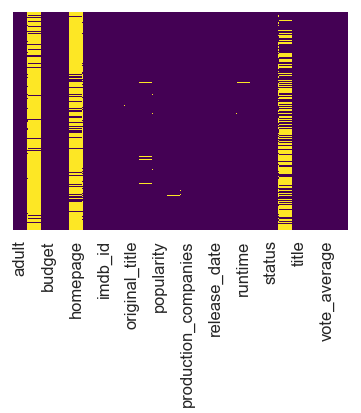

In [434]:
sns.heatmap(movie_meta.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

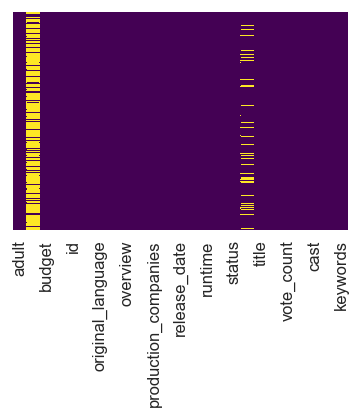

In [435]:
sns.heatmap(movie_meta_droped.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [436]:
#terminal NaN value
movie_meta_droped = movie_meta_droped.dropna(thresh = 5)

In [437]:
movie_meta_droped['adult'].unique()

array(['False', 'True'], dtype=object)

In [438]:
movie_meta_droped['adult'] = movie_meta_droped['adult'].map({'True': True, 'False': False})

In [439]:
movie_meta_droped['belongs_to_collection'] = movie_meta_droped['belongs_to_collection'].notna()

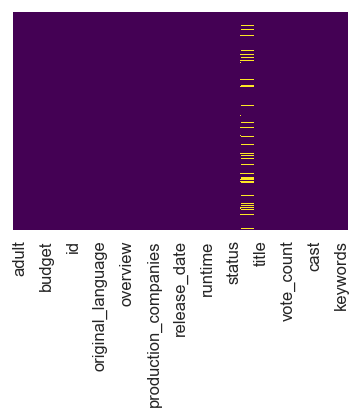

In [440]:
sns.heatmap(movie_meta_droped.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [441]:
movie_meta_droped[movie_meta_droped['budget'] == 0]['budget'].count()

880

In [442]:
movie_meta_droped[movie_meta_droped['revenue'] == 0]['revenue'].count()

1228

In [443]:
movie_meta_droped['budget'] = pd.to_numeric(movie_meta_droped['budget'], errors = 'coerce')
# revenue is already a float
movie_meta_droped.loc[(movie_meta_droped['budget'] == 0) & (movie_meta_droped['revenue'] == 0), 'revenue'] = np.nan
movie_meta_droped.loc[movie_meta_droped['budget'] == 0, 'budget'] = np.nan

In [444]:
movie_meta_droped[movie_meta_droped['budget'] < 100]['budget'].count()

20

In [445]:
def scale(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 1000
    else:
        return num

In [446]:
movie_meta_droped[['budget', 'revenue']] = movie_meta_droped[['budget', 'revenue']].applymap(scale)

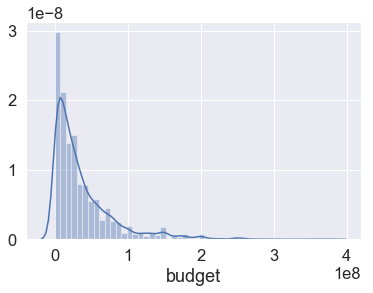

In [447]:
sns.distplot(movie_meta_droped[movie_meta_droped['budget'].notnull()]['budget'])

C:\Users\Acer\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



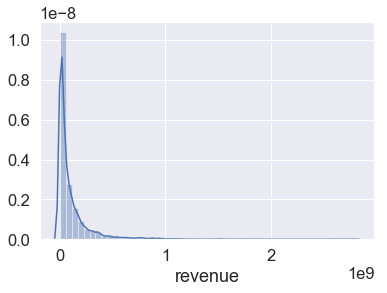

In [522]:
sns.distplot(movie_meta_droped[movie_meta_droped['revenue'].notnull()]['revenue'])

In [448]:
# movie_meta_droped[movie_meta_droped['budget']==1e8]

In [449]:
def get_values(data_str):
    if isinstance(data_str, float):
        pass
    else:
        values = []
        data_str = ast.literal_eval(data_str)
        if isinstance(data_str, list):
            for k_v in data_str:
                values.append(k_v['name'])
            return values
        else:
            return None

In [450]:
movie_meta_droped[['genres', 'production_companies', 'production_countries', 'spoken_languages','title','crew','cast']]

genres  \
0     [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1     [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
2     [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
3     [{'id': 36, 'name': 'History'}, {'id': 18, 'na...   
4     [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
5     [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   
6     [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
7     [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...   
8     [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...   
9     [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
10    [{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...   
11    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
12    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
13    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
14    [{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...   
15                        [{'id': 18, 'name': 'Drama'}]   
16    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
17    [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...   
18    [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...   
19    [{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...   
20    [{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na...   
21    [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
22    [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   
23    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
24    [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   
25    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
26    [{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...   
27                       [{'id': 35, 'name': 'Comedy'}]   
28    [{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...   
29    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
...                                                 ...   
4569  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
4570  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4571  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
4572                      [{'id': 18, 'name': 'Drama'}]   
4573                                                 []   
4574  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
4575                      [{'id': 18, 'name': 'Drama'}]   
4576                  [{'id': 12, 'name': 'Adventure'}]   
4577  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4578  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
4579  [{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...   
4580  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
4581                      [{'id': 18, 'name': 'Drama'}]   
4582  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4583  [{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...   
4584  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
4585  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
4586  [{'id': 99, 'name': 'Documentary'}, {'id': 18,...   
4587                [{'id': 99, 'name': 'Documentary'}]   
4588  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
4589  [{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...   
4590  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   
4591                      [{'id': 18, 'name': 'Drama'}]   
4592  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
4593                     [{'id': 27, 'name': 'Horror'}]   
4594  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   
4595                     [{'id': 35, 'name': 'Comedy'}]   
4596  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   
4597                [{'id': 99, 'name': 'Documentary'}]   
4598  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...   

                                   production_companies  \
0        [{'name': 'Pixar Animation Studios', 'id': 3}]   
1     [{'name': 'United Artists', 'id': 60}, {'name'...   
2     [{'name': 'Columbia Pictures', 'id': 5}, {'nam...   
3     [{'name': 'Hollywood Pictures', 'id': 915}, {'...   
4     [{'name': 'Le Studio Canal+', 'id': 183}, {'na...   
5     [{'name': 'Universal Pictures'

In [451]:
movie_meta_droped[['genres', 'production_companies', 'production_countries', 'spoken_languages','crew','cast','keywords']] = movie_meta_droped[['genres', 'production_companies', 'production_countries', 'spoken_languages','crew','cast','keywords']].applymap(get_values)

In [452]:
movie_meta_droped[['genres', 'production_companies', 'production_countries', 'spoken_languages','title','crew','cast']]

genres  \
0               [Animation, Comedy, Family]   
1             [Adventure, Action, Thriller]   
2                  [Comedy, Drama, Romance]   
3                          [History, Drama]   
4                       [Action, Adventure]   
5                            [Drama, Crime]   
6                          [Drama, Romance]   
7                           [Crime, Comedy]   
8                [Crime, Comedy, Adventure]   
9                   [Action, Comedy, Crime]   
10                [Comedy, Thriller, Crime]   
11                        [Drama, Thriller]   
12     [Action, Adventure, Crime, Thriller]   
13                         [Drama, Romance]   
14         [Fantasy, Drama, Comedy, Family]   
15                                  [Drama]   
16                 [Comedy, Drama, Romance]   
17                             [Drama, War]   
18                        [Action, Fantasy]   
19       [Fantasy, Drama, Comedy, Thriller]   
20               [Crime, Mystery, Thriller]   
21    [Adventure, Animation, Drama, Family]   
22                 [Drama, Crime, Thriller]   
23                 [Comedy, Drama, Romance]   
24             [Adventure, Family, Fantasy]   
25                        [Drama, Thriller]   
26                   [Music, Drama, Family]   
27                                 [Comedy]   
28        [Horror, Action, Thriller, Crime]   
29                        [Drama, Thriller]   
...                                     ...   
4569                       [Action, Comedy]   
4570               [Comedy, Drama, Romance]   
4571                       [Drama, Romance]   
4572                                [Drama]   
4573                                     []   
4574                        [Action, Drama]   
4575                                [Drama]   
4576                            [Adventure]   
4577     [Comedy, Drama, Romance, TV Movie]   
4578                        [Drama, Family]   
4579               [Thriller, Crime, Drama]   
4580        [Science Fiction, Drama, Music]   
4581                                [Drama]   
4582     [Thriller, Drama, Science Fiction]   
4583                       [Drama, Foreign]   
4584                       [Drama, Romance]   
4585              [Action, Drama, Thriller]   
4586                   [Documentary, Drama]   
4587                          [Documentary]   
4588               [Drama, Romance, Family]   
4589                   [Fantasy, Adventure]   
4590             [Adventure, Drama, Family]   
4591                                [Drama]   
4592                       [Drama, Romance]   
4593                               [Horror]   
4594                       [Comedy, Family]   
4595                               [Comedy]   
4596                [Comedy, Family, Drama]   
4597                          [Documentary]   
4598                        [Drama, Comedy]   

                                   production_companies  \
0                             [Pixar Animation Studios]   
1                     [United Artists, Eon Productions]   
2        [Columbia Pictures, Castle Rock Entertainment]   
3     [Hollywood Pictures, Cinergi Pictures Entertai...   
4     [Le Studio Canal+, Laurence Mark Productions, ...   
5     [Universal Pictures, Légende Entreprises, Syal...   
6     [Columbia Pictures Corporation, Mirage Enterpr...   
7                         [Miramax Films, A Band Apart]   
8     [O Entertainment, Warner Bros., Morgan Creek P...   
9                                   [Columbia Pictures]   
10            [Jersey Films, Metro-Goldwyn-Mayer (MGM)]   
11          [Regency Enterprises, New Regency Pictures]   
12    [Silver Pictures, Canal+, Warner Bros., Dino D...   
13                 [United Artists, Intial Productions]   
14     [Universal Pictures, Kennedy Miller Productions]   
15    [Havoc, PolyGram Filmed Entertainment, Working...   
16                                 [Paramount Pictures]   
17    [British Screen, Mayfair Entertainment Interna...   
1

In [453]:
movie_meta_droped['release_date'] = pd.to_datetime(movie_meta_droped['release_date'], format = '%Y-%m-%d', errors='coerce')

In [454]:
movie_meta_droped.head()

adult  belongs_to_collection      budget                         genres  \
0  False                   True  30000000.0    [Animation, Comedy, Family]   
1  False                   True  58000000.0  [Adventure, Action, Thriller]   
2  False                  False  62000000.0       [Comedy, Drama, Romance]   
3  False                  False  44000000.0               [History, Drama]   
4  False                  False  98000000.0            [Action, Adventure]   

      id    imdb_id original_language          original_title  \
0    862  tt0114709                en               Toy Story   
1    710  tt0113189                en               GoldenEye   
2   9087  tt0112346                en  The American President   
3  10858  tt0113987                en                   Nixon   
4   1408  tt0112760                en        Cutthroat Island   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  James Bond must unmask the mysterious head of ...   14.686036   
2  Widowed U.S. president Andrew Shepherd, one of...    6.318445   
3  An all-star cast powers this epic look at Amer...    5.092000   
4  Morgan Adams and her slave, William Shaw, are ...    7.284477   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

              spoken_languages    status  \
0                    [English]  Released   
1  [English, Pусский, Español]  Released   
2                    [English]  Released   
3                    [English]  Released   
4             [English, Latin]  Released   

                                             tagline                   title  \
0                                                NaN               Toy Story   
1               No limits. No fears. No substitutes.               GoldenEye   
2  Why can't the most powerful man in the world h...  The American President   
3  Triumphant in Victory, Bitter in Defeat. He Ch...                   Nixon   
4  The Course Has Been Set. There Is No Turning B...        Cutthroat Island   

   vote_average vote_count                  tittle  \
0           7.7     5415.0               Toy Story   
1           6.6     1194.0               GoldenEye   
2           6.5      199.0  The American President   
3           7.1       72.0                   Nixon   
4           5.7      137.0        Cutthroat Island   

                                                cast  \
0  [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1  [Pierce Brosnan, Sean Bean, Izabella Scorupco,...   
2  [Michael Douglas, Annette Bening, Michael J. F...   
3  [Anthony Hopkins, Joan Allen, Powers Boothe, E...   
4  [Geena Davis, Matthew Modine, Frank Langella, ...   

                                                crew  \
0  [Andrew Stanton, Andrew Stanton, Andrew Stanto...   
1  [Eric Serra, Tina Turner, Ian Fleming, Peter L...   
2  [John Seale, Rob Reiner, Rob Reiner, Robert Le...   
3  [John Williams, Robert Richardson, Oliver Ston...   
4  [Peter Levy, Maggie Gray, Norman Garwood, Mari...   

                                            keywords  
0  [jealousy, toy, boy, friendship, friends, riva...  
1  [cuba, falsely accused, secret identity, compu...  
2  [white house, usa president, new love, widower...  
3  [usa president, presidential election, waterga...  
4  [exotic island, treasure, map, ship, scalp, pi...  

[5 rows x 25 columns]

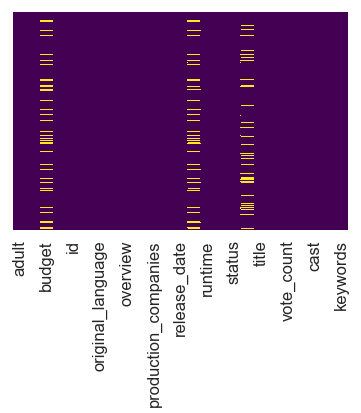

In [455]:
sns.heatmap(movie_meta_droped.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [456]:
movie_meta_droped['profit'] = movie_meta_droped['revenue'] - movie_meta_droped['budget']

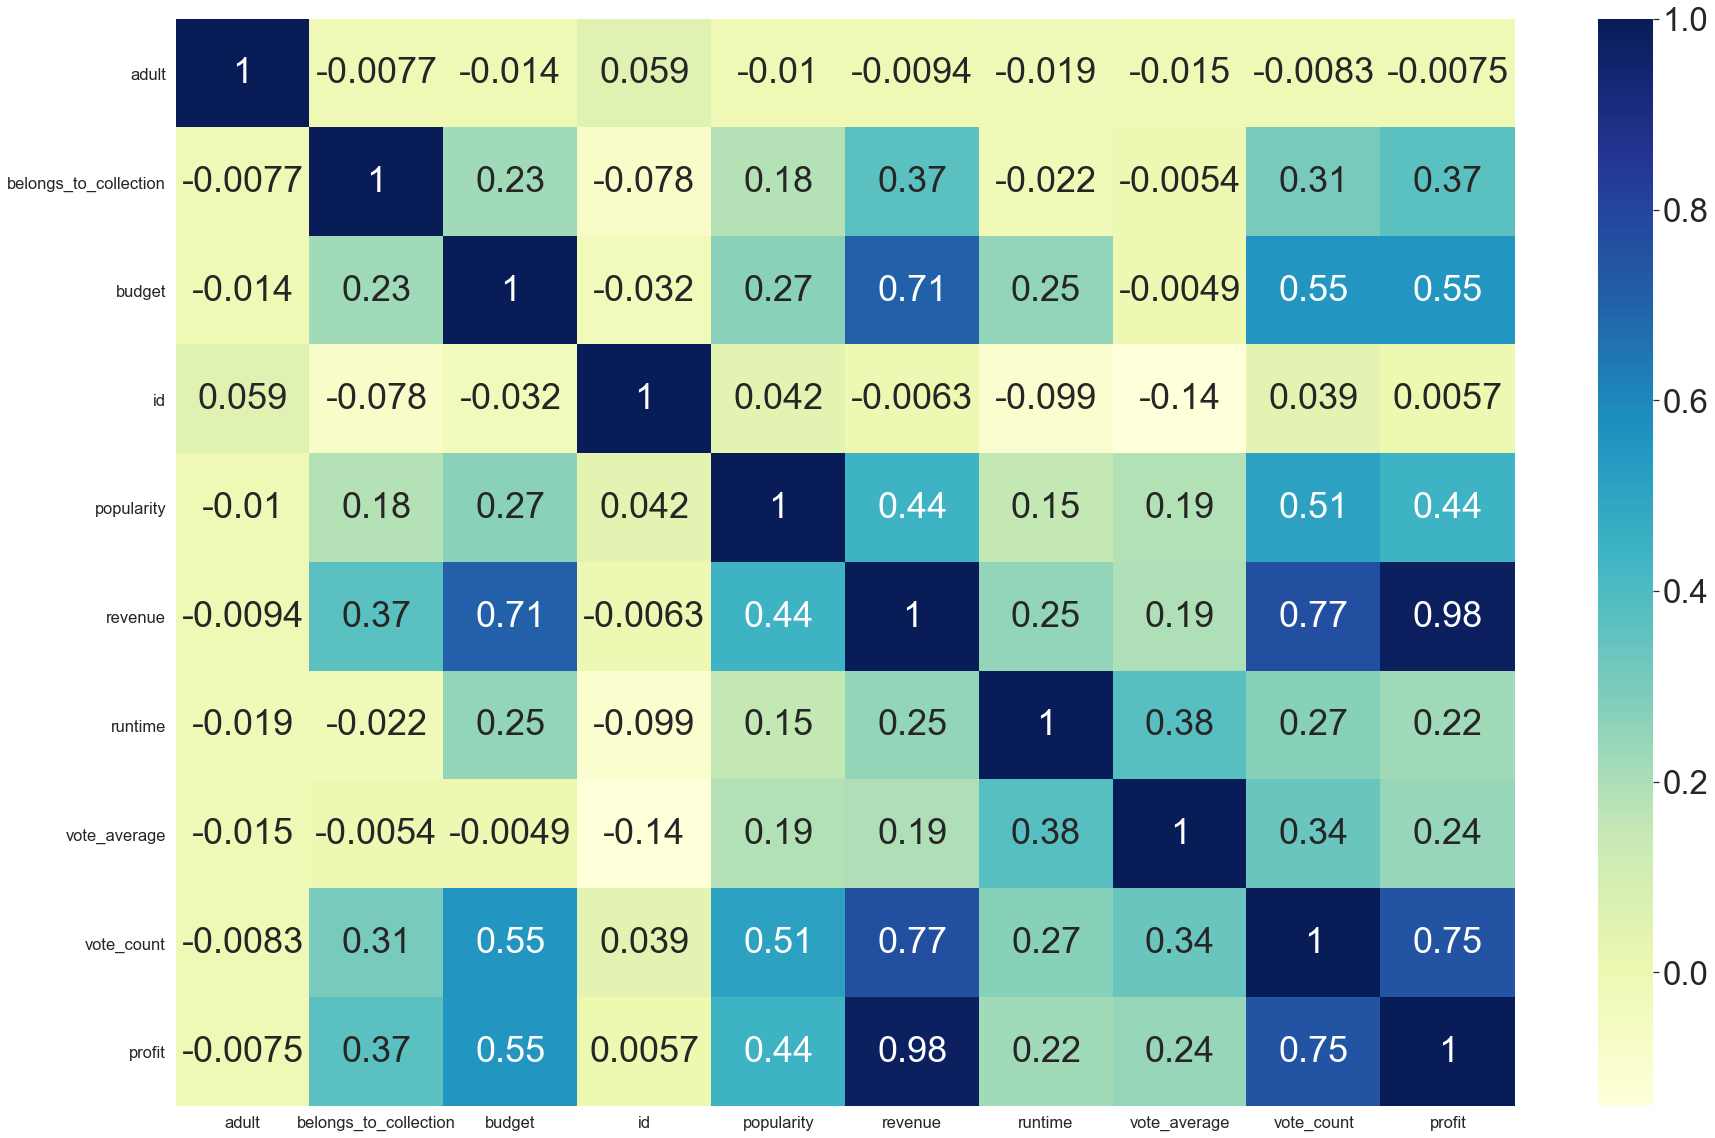

In [457]:
plt.subplots(figsize=(30,20))
sns.set(font_scale=3.0)
sns.heatmap(movie_meta_droped.corr(),annot=True, cmap = 'YlGnBu',)

In [458]:
def counting_values(df, column):
    value_count = {}
    for row in df[column].dropna():
        if len(row) > 0:
            for key in row:
                if key in value_count:
                    value_count[key] += 1
                else:
                    value_count[key] = 1
        else:
            pass
    return value_count

In [459]:
countries = pd.Series(counting_values(movie_meta_droped, 'production_countries'))

#the map didn't come out so interesting in a regular scale, so I changed it to a logarithmic one:
ln_countries = pd.Series(np.log(countries.values), index = countries.index)

In [460]:
data = dict(type = 'choropleth',
           locations = ln_countries.index,
           locationmode = 'country names',
           colorscale = 'Blackbody',
           text = countries.values,
           z = ln_countries.values,
           colorbar = {'title': 'log of Sum of Movies'})

layout = dict(title = 'Movies Filmed in Countries around the World',
             geo = dict(showframe = False,
                       projection = {'type': 'natural earth'}))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

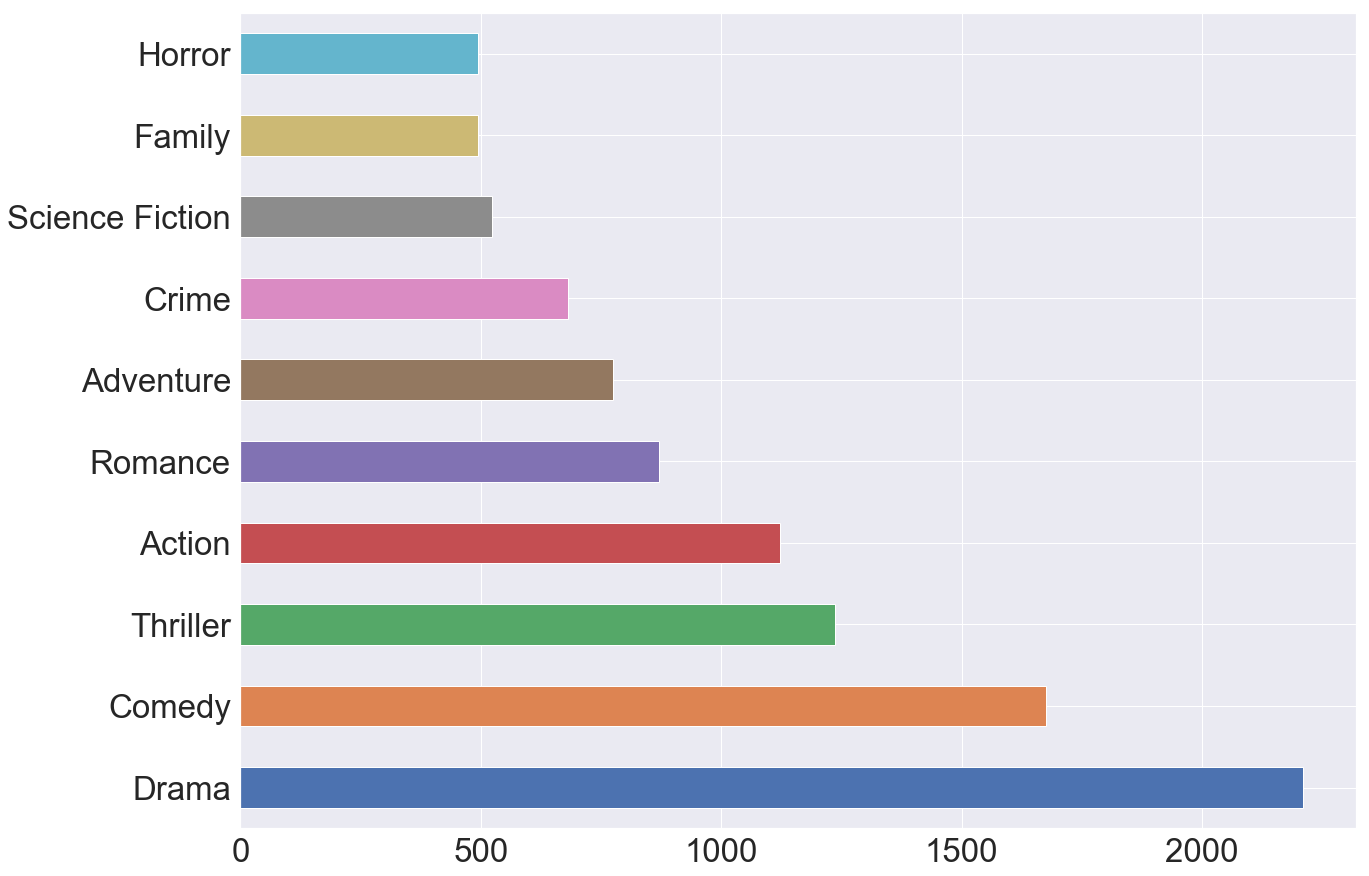

In [461]:
plt.subplots(figsize=(20,15))
sns.set(font_scale=1.5)

genres_count = pd.Series(counting_values(movie_meta_droped, 'genres'))
genres_count.sort_values(ascending = False).head(10).plot(kind = 'barh')

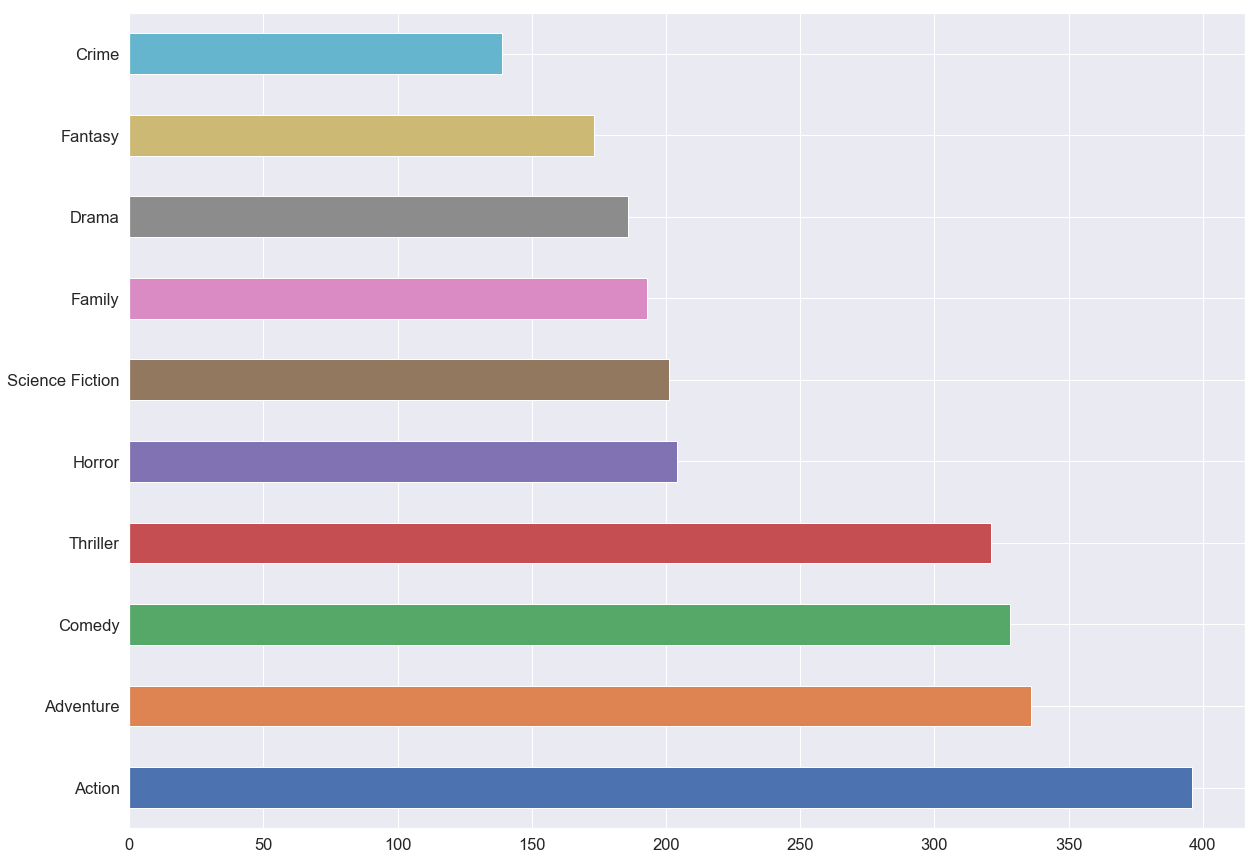

In [462]:
plt.subplots(figsize=(20,15))

genres_count = pd.Series(counting_values(movie_meta_droped[movie_meta_droped['belongs_to_collection'] == True], 'genres'))
genres_count.sort_values(ascending = False).head(10).plot(kind = 'barh')

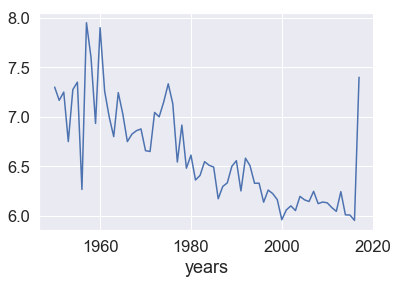

In [463]:
movie_meta_droped['years'] = movie_meta_droped['release_date'].apply(lambda x: x.year)

movie_meta_droped[(movie_meta_droped['years'] < 2018) & (movie_meta_droped['years'] >= 1950)].groupby(by = 'years').mean()['vote_average'].plot()

In [464]:
C= movie_meta_droped['vote_average'].mean()
C

6.195390302239617

In [465]:
m= movie_meta_droped['vote_count'].quantile(0.9)
m

1966.0

In [466]:
movie_meta_droped.shape

(4599, 27)

In [467]:
q_movies = movie_meta_droped.copy().loc[movie_meta_droped['vote_count'] >= m]
q_movies.shape

(461, 27)

In [468]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [469]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [470]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

title  vote_count  vote_average  \
89                         The Shawshank Redemption      8358.0           8.5   
2762                                The Dark Knight     12269.0           8.3   
862                                      Fight Club      9678.0           8.3   
210                                   The Godfather      6024.0           8.5   
85                                     Pulp Fiction      8670.0           8.3   
3236                                      Inception     14075.0           8.1   
3997                                   Interstellar     11187.0           8.1   
103                                    Forrest Gump      8147.0           8.2   
1847  The Lord of the Rings: The Return of the King      8226.0           8.1   
281                         The Empire Strikes Back      5998.0           8.2   

         score  
89    8.061133  
2762  8.009332  
862   7.944653  
210   7.932933  
85    7.910976  
3236  7.866569  
3997  7.815315  
103   7.810297  
1847  7.732608  
281   7.705140

Text(0.5, 1.0, 'Popular Movies')

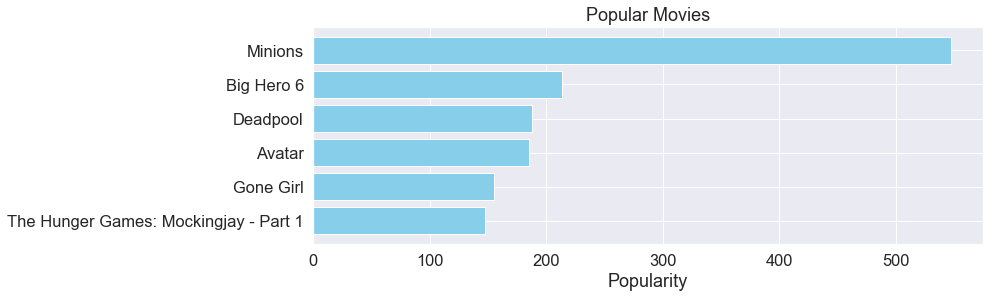

In [471]:
pop= movie_meta_droped.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [472]:
movie_meta_droped['overview'].head(5)

0    Led by Woody, Andy's toys live happily in his ...
1    James Bond must unmask the mysterious head of ...
2    Widowed U.S. president Andrew Shepherd, one of...
3    An all-star cast powers this epic look at Amer...
4    Morgan Adams and her slave, William Shaw, are ...
Name: overview, dtype: object

In [473]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movie_meta_droped['overview'] = movie_meta_droped['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movie_meta_droped['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4599, 20334)

In [474]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [475]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movie_meta_droped.index, index=movie_meta_droped['title']).drop_duplicates()

In [476]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movie_meta_droped['title'].iloc[movie_indices]

In [477]:
get_recommendations('The Dark Knight Rises')

2762                            The Dark Knight
50                               Batman Forever
352                              Batman Returns
157                                      Batman
3786    Batman: The Dark Knight Returns, Part 2
2193                              Batman Begins
2575                                  Slow Burn
4357         Batman v Superman: Dawn of Justice
971                                         JFK
393                              Batman & Robin
Name: title, dtype: object

In [478]:
get_recommendations('The Avengers')

4203            Avengers: Age of Ultron
4111                            Plastic
112                             Timecop
2350              Thank You for Smoking
727                       The Corruptor
3278    Wall Street: Money Never Sleeps
2012         Team America: World Police
3964                        Snowpiercer
2454                       The Fountain
4327                          Allegiant
Name: title, dtype: object

In [479]:
movie_meta_droped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4599 entries, 0 to 4598
Data columns (total 27 columns):
adult                    4599 non-null bool
belongs_to_collection    4599 non-null bool
budget                   3719 non-null float64
genres                   4599 non-null object
id                       4599 non-null int64
imdb_id                  4599 non-null object
original_language        4599 non-null object
original_title           4599 non-null object
overview                 4599 non-null object
popularity               4599 non-null float64
production_companies     4599 non-null object
production_countries     4599 non-null object
release_date             4599 non-null datetime64[ns]
revenue                  3864 non-null float64
runtime                  4599 non-null float64
spoken_languages         4599 non-null object
status                   4599 non-null object
tagline                  3889 non-null object
title                    4599 non-null object
vote_average

In [480]:
#drop all the unnessary features
# movie_meta_droped=movie_meta_droped.drop(columns=['genres'])
#merge col to movie_meta
# tmdb_movie[['id','genres']].columns=['id','genres']
# movie_meta_droped= movie_meta_droped.merge(tmdb_movie[['id','genres']],on='id')

In [481]:
# print(movie_meta_droped['crew'][0])

In [482]:
# Parse the stringified features into their corresponding python objects
# from ast import literal_eval



# features = ['cast', 'crew', 'keywords', 'genres']
# for feature in features:
#     movie_meta_droped[feature] = movie_meta_droped[feature].apply(literal_eval)
#     print('thanh cong')

In [483]:
movie_meta_droped['genres'].head(5)

0      [Animation, Comedy, Family]
1    [Adventure, Action, Thriller]
2         [Comedy, Drama, Romance]
3                 [History, Drama]
4              [Action, Adventure]
Name: genres, dtype: object

In [484]:
movie_meta_droped['keywords'].head(5)

0    [jealousy, toy, boy, friendship, friends, riva...
1    [cuba, falsely accused, secret identity, compu...
2    [white house, usa president, new love, widower...
3    [usa president, presidential election, waterga...
4    [exotic island, treasure, map, ship, scalp, pi...
Name: keywords, dtype: object

In [485]:
# drop all the unnessary features
movie_meta_droped=movie_meta_droped.drop(columns=['crew'])
# merge col to movie_meta
tmdb_credit[['id','crew']].columns=['id','crew']
movie_meta_droped= movie_meta_droped.merge(tmdb_credit[['id','crew']],on='id')

In [486]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    x=json.loads(x)
    for i in x:
        print(i)
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [487]:
# print(movie_meta_droped.info())

In [488]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [489]:
# Define new director, cast, genres and keywords features that are in a suitable form.
movie_meta_droped['director'] = movie_meta_droped['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movie_meta_droped[feature] = movie_meta_droped[feature].apply(get_list)
    print(movie_meta_droped[feature])

{'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton'}
{'credit_id': '5891edf9c3a36809700075e6', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Original Story', 'name': 'Andrew Stanton'}
{'credit_id': '5892132b9251412dc80097b1', 'department': 'Visual Effects', 'gender': 2, 'id': 7, 'job': 'Character Designer', 'name': 'Andrew Stanton'}
{'credit_id': '52fe4284c3a36847f8024f8b', 'department': 'Editing', 'gender': 2, 'id': 8, 'job': 'Editor', 'name': 'Lee Unkrich'}
{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter'}
{'credit_id': '52fe426ec3a36847f801e16f', 'department': 'Sound', 'gender': 0, 'id': 996, 'job': 'Original Music Composer', 'name': 'Eric Serra'}
{'credit_id': '52fe426ec3a36847f801e175', 'department': 'Sound', 'gender': 1, 'id': 1459, 'job': 'Songs', 'name': 'Tina Turner'}
{'credit_id': '52fe426ec3a36847f

{'credit_id': '52fe43829251416c75013323', 'department': 'Editing', 'gender': 2, 'id': 21140, 'job': 'Editor', 'name': 'Eric A. Sears'}
{'credit_id': '52fe43829251416c750132ed', 'department': 'Writing', 'gender': 2, 'id': 35694, 'job': 'Screenplay', 'name': 'Jason Friedberg'}
{'credit_id': '52fe43829251416c750132f3', 'department': 'Writing', 'gender': 2, 'id': 35734, 'job': 'Screenplay', 'name': 'Aaron Seltzer'}
{'credit_id': '52fe43829251416c75013311', 'department': 'Production', 'gender': 2, 'id': 57708, 'job': 'Executive Producer', 'name': 'Robert L. Rosen'}
{'credit_id': '52fe43829251416c750132db', 'department': 'Directing', 'gender': 2, 'id': 65548, 'job': 'Director', 'name': 'Rick Friedberg'}
{'credit_id': '52fe4290c3a36847f802879d', 'department': 'Camera', 'gender': 2, 'id': 7753, 'job': 'Director of Photography', 'name': 'Gilbert Taylor'}
{'credit_id': '52fe4290c3a36847f802876d', 'department': 'Directing', 'gender': 2, 'id': 240, 'job': 'Director', 'name': 'Stanley Kubrick'}
{'c

{'credit_id': '56a4c4c5925141524c001bcf', 'department': 'Writing', 'gender': 2, 'id': 52361, 'job': 'Screenplay', 'name': 'Cinco Paul'}
{'credit_id': '52fe44a2c3a368484e02e3b1', 'department': 'Directing', 'gender': 2, 'id': 61411, 'job': 'Director', 'name': 'Mark Dindal'}
{'credit_id': '52fe4956c3a368484e12665f', 'department': 'Writing', 'gender': 0, 'id': 67583, 'job': 'Screenplay', 'name': 'Stavros Kazantzidis'}
{'credit_id': '52fe4956c3a368484e12666b', 'department': 'Writing', 'gender': 0, 'id': 142513, 'job': 'Screenplay', 'name': 'Emma-Kate Croghan'}
{'credit_id': '52fe4956c3a368484e126659', 'department': 'Directing', 'gender': 0, 'id': 142513, 'job': 'Director', 'name': 'Emma-Kate Croghan'}
{'credit_id': '59a2d5aac3a368478f03fde6', 'department': 'Production', 'gender': 0, 'id': 561, 'job': 'Casting Associate', 'name': 'John Papsidera'}
{'credit_id': '52fe44edc3a36847f80b2575', 'department': 'Camera', 'gender': 2, 'id': 2287, 'job': 'Director of Photography', 'name': 'Bill Butler'

{'credit_id': '52fe4291c3a36847f8028cf9', 'department': 'Camera', 'gender': 2, 'id': 2209, 'job': 'Director of Photography', 'name': 'Jan de Bont'}
{'credit_id': '52fe4291c3a36847f8028ce1', 'department': 'Sound', 'gender': 2, 'id': 2585, 'job': 'Original Music Composer', 'name': 'Eric Clapton'}
{'credit_id': '52fe4291c3a36847f8028d0b', 'department': 'Production', 'gender': 1, 'id': 3806, 'job': 'Casting', 'name': 'Marion Dougherty'}
{'credit_id': '52fe4291c3a36847f8028cdb', 'department': 'Production', 'gender': 2, 'id': 4699, 'job': 'Producer', 'name': 'Steve Perry'}
{'credit_id': '52fe4291c3a36847f8028cab', 'department': 'Directing', 'gender': 2, 'id': 7187, 'job': 'Director', 'name': 'Richard Donner'}
{'credit_id': '52fe428ec3a36847f8027f59', 'department': 'Production', 'gender': 2, 'id': 488, 'job': 'Executive Producer', 'name': 'Steven Spielberg'}
{'credit_id': '52fe428ec3a36847f8027f95', 'department': 'Sound', 'gender': 0, 'id': 671, 'job': 'Supervising Sound Editor', 'name': 'Ric

{'credit_id': '557374aec3a36839200050e5', 'department': 'Production', 'gender': 0, 'id': 5144, 'job': 'Executive Producer', 'name': 'Ronald Bass'}
{'credit_id': '5786aff4925141016c00803c', 'department': 'Writing', 'gender': 0, 'id': 5144, 'job': 'Story', 'name': 'Ronald Bass'}
{'credit_id': '53748b9c0e0a267c5500377f', 'department': 'Production', 'gender': 1, 'id': 5489, 'job': 'Casting', 'name': 'Michelle Guish'}
{'credit_id': '58137ee0c3a3687aa00270a1', 'department': 'Visual Effects', 'gender': 0, 'id': 6060, 'job': 'Special Effects Supervisor', 'name': 'Neil Corbould'}
{'credit_id': '58bc4fbdc3a36851cd022905', 'department': 'Sound', 'gender': 2, 'id': 19155, 'job': 'Original Music Composer', 'name': 'Christopher Young'}
{'credit_id': '58137abf925141579e0248cd', 'department': 'Art', 'gender': 2, 'id': 8646, 'job': 'Art Direction', 'name': 'Keith Pain'}
{'credit_id': '5813806892514157430250e5', 'department': 'Sound', 'gender': 2, 'id': 9854, 'job': 'Supervising Sound Editor', 'name': '

{'credit_id': '52fe44c2c3a36847f80a873b', 'department': 'Production', 'gender': 2, 'id': 56158, 'job': 'Producer', 'name': 'Lorne Michaels'}
{'credit_id': '52fe44c2c3a36847f80a8717', 'department': 'Directing', 'gender': 0, 'id': 58448, 'job': 'Director', 'name': 'Penelope Spheeris'}
{'credit_id': '52fe441e9251416c750297cd', 'department': 'Sound', 'gender': 2, 'id': 947, 'job': 'Original Music Composer', 'name': 'Hans Zimmer'}
{'credit_id': '52fe441e9251416c750297c7', 'department': 'Production', 'gender': 2, 'id': 3658, 'job': 'Producer', 'name': 'Robert Greenhut'}
{'credit_id': '52fe441e9251416c750297d3', 'department': 'Camera', 'gender': 2, 'id': 4008, 'job': 'Director of Photography', 'name': 'Miroslav Ondříček'}
{'credit_id': '52fe441e9251416c750297df', 'department': 'Editing', 'gender': 2, 'id': 11454, 'job': 'Editor', 'name': 'George Bowers'}
{'credit_id': '52fe441e9251416c750297b5', 'department': 'Directing', 'gender': 1, 'id': 14911, 'job': 'Director', 'name': 'Penny Marshall'}


{'credit_id': '53675e5ec3a368122000446b', 'department': 'Production', 'gender': 1, 'id': 2953, 'job': 'Casting', 'name': 'Lora Kennedy'}
{'credit_id': '53675e7bc3a36812380041eb', 'department': 'Costume & Make-Up', 'gender': 1, 'id': 6209, 'job': 'Costume Design', 'name': 'Kym Barrett'}
{'credit_id': '52fe44c2c3a36847f80a85e3', 'department': 'Production', 'gender': 2, 'id': 8299, 'job': 'Executive Producer', 'name': 'Andrew Mason'}
{'credit_id': '5856a8a392514146c903d4c4', 'department': 'Art', 'gender': 2, 'id': 9343, 'job': 'Production Design', 'name': 'Owen Paterson'}
{'credit_id': '5856a8d3c3a3682fb805bbee', 'department': 'Art', 'gender': 2, 'id': 9344, 'job': 'Art Direction', 'name': 'Hugh Bateup'}
{'credit_id': '5856bc0d9251416f1005135a', 'department': 'Sound', 'gender': 2, 'id': 9349, 'job': 'Sound Designer', 'name': 'Dane A. Davis'}
{'credit_id': '5856bc63c3a36806a7041b20', 'department': 'Sound', 'gender': 2, 'id': 9349, 'job': 'Supervising Sound Editor', 'name': 'Dane A. Davis'}

{'credit_id': '52fe45659251416c75054ed9', 'department': 'Directing', 'gender': 2, 'id': 17114, 'job': 'Director', 'name': 'John Cameron Mitchell'}
{'credit_id': '52fe4285c3a36847f8025527', 'department': 'Writing', 'gender': 2, 'id': 142, 'job': 'Author', 'name': 'William Broyles Jr.'}
{'credit_id': '53620f2bc3a368395600115c', 'department': 'Production', 'gender': 1, 'id': 2215, 'job': 'Casting', 'name': 'Denise Chamian'}
{'credit_id': '5586cf229251411dec0049b8', 'department': 'Art', 'gender': 2, 'id': 1226, 'job': 'Production Design', 'name': 'Rick Heinrichs'}
{'credit_id': '52fe4285c3a36847f8025521', 'department': 'Directing', 'gender': 2, 'id': 510, 'job': 'Director', 'name': 'Tim Burton'}
{'credit_id': '52fe45cc9251416c9103eb7b', 'department': 'Directing', 'gender': 2, 'id': 26882, 'job': 'Director', 'name': 'Kiyoshi Kurosawa'}
{'credit_id': '52fe43319251416c75007087', 'department': 'Camera', 'gender': 2, 'id': 1060, 'job': 'Director of Photography', 'name': 'Dean Cundey'}
{'credit_

{'credit_id': '52fe46e59251416c750872b9', 'department': 'Writing', 'gender': 0, 'id': 67395, 'job': 'Writer', 'name': 'Temple Mathews'}
{'credit_id': '52fe46e59251416c750872ad', 'department': 'Directing', 'gender': 0, 'id': 1027737, 'job': 'Director', 'name': 'Robin Budd'}
{'credit_id': '52fe47409251416c9106f213', 'department': 'Directing', 'gender': 2, 'id': 52049, 'job': 'Director', 'name': 'Jay Chandrasekhar'}
{'credit_id': '52fe46189251416c7506cef3', 'department': 'Directing', 'gender': 2, 'id': 64061, 'job': 'Director', 'name': 'Fred Schepisi'}
{'credit_id': '52fe43159251416c75002b83', 'department': 'Production', 'gender': 1, 'id': 495, 'job': 'Casting', 'name': 'Debra Zane'}
{'credit_id': '52fe43159251416c75002b8f', 'department': 'Art', 'gender': 1, 'id': 602, 'job': 'Production Design', 'name': 'Linda DeScenna'}
{'credit_id': '52fe43159251416c75002b71', 'department': 'Sound', 'gender': 2, 'id': 4500, 'job': 'Original Music Composer', 'name': 'John Debney'}
{'credit_id': '52fe431

{'credit_id': '52fe46379251416c7507104b', 'department': 'Art', 'gender': 0, 'id': 24164, 'job': 'Art Direction', 'name': 'Andreas Olshausen'}
{'credit_id': '52fe46369251416c75070fdb', 'department': 'Directing', 'gender': 2, 'id': 25735, 'job': 'Director', 'name': 'Christian Duguay'}
{'credit_id': '52fe44d1c3a36847f80abe45', 'department': 'Sound', 'gender': 2, 'id': 1213, 'job': 'Original Music Composer', 'name': 'James Newton Howard'}
{'credit_id': '5911acbcc3a368646b047098', 'department': 'Production', 'gender': 1, 'id': 7902, 'job': 'Casting', 'name': 'Ruth Lambert'}
{'credit_id': '55685d3cc3a3681c650023f0', 'department': 'Production', 'gender': 1, 'id': 7903, 'job': 'Casting', 'name': 'Mary Hidalgo'}
{'credit_id': '5911ae759251414e800435fe', 'department': 'Sound', 'gender': 2, 'id': 9349, 'job': 'Sound Designer', 'name': 'Dane A. Davis'}
{'credit_id': '5911ae80c3a36864d4044d06', 'department': 'Sound', 'gender': 2, 'id': 9349, 'job': 'Supervising Sound Editor', 'name': 'Dane A. Davis

{'credit_id': '52fe43939251416c75015bef', 'department': 'Camera', 'gender': 0, 'id': 26731, 'job': 'Director of Photography', 'name': 'Arthur Wong'}
{'credit_id': '52fe43939251416c75015bdd', 'department': 'Production', 'gender': 2, 'id': 56719, 'job': 'Executive Producer', 'name': 'Willie Chan'}
{'credit_id': '52fe43939251416c75015c01', 'department': 'Editing', 'gender': 0, 'id': 56870, 'job': 'Editor', 'name': 'Ki-hop Chan'}
{'credit_id': '52fe43939251416c75015bf5', 'department': 'Editing', 'gender': 2, 'id': 58208, 'job': 'Editor', 'name': 'Don Brochu'}
{'credit_id': '52fe43939251416c75015be3', 'department': 'Production', 'gender': 2, 'id': 64425, 'job': 'Executive Producer', 'name': 'Albert Yeung'}
{'credit_id': '52fe43939251416c75015bc5', 'department': 'Writing', 'gender': 0, 'id': 64901, 'job': 'Screenplay', 'name': 'Gordon Chan'}
{'credit_id': '52fe43939251416c75015bfb', 'department': 'Directing', 'gender': 0, 'id': 64901, 'job': 'Director', 'name': 'Gordon Chan'}
{'credit_id': '

{'credit_id': '5385fb37c3a3681ada001446', 'department': 'Editing', 'gender': 2, 'id': 9584, 'job': 'Editor', 'name': 'Richard C. Meyer'}
{'credit_id': '5385fb1ec3a3681ae30013fe', 'department': 'Camera', 'gender': 0, 'id': 24665, 'job': 'Director of Photography', 'name': 'Armando Nannuzzi'}
{'credit_id': '52fe45019251416c91024379', 'department': 'Writing', 'gender': 2, 'id': 25795, 'job': 'Scenario Writer', 'name': 'Vittorio Bonicelli'}
{'credit_id': '5385fb54c3a3681af30014ab', 'department': 'Art', 'gender': 2, 'id': 32382, 'job': 'Production Design', 'name': 'Mario Garbuglia'}
{'credit_id': '52fe45019251416c91024367', 'department': 'Directing', 'gender': 2, 'id': 38131, 'job': 'Director', 'name': 'Sergey Bondarchuk'}
{'credit_id': '52fe43309251416c75006f07', 'department': 'Sound', 'gender': 2, 'id': 1589, 'job': 'Original Music Composer', 'name': 'Michael Andrews'}
{'credit_id': '52fe43309251416c75006ed7', 'department': 'Directing', 'gender': 2, 'id': 5877, 'job': 'Director', 'name': '

{'credit_id': '52fe433c9251416c75008a25', 'department': 'Camera', 'gender': 2, 'id': 2507, 'job': 'Director of Photography', 'name': 'Matthew F. Leonetti'}
{'credit_id': '52fe433c9251416c75008a19', 'department': 'Production', 'gender': 2, 'id': 9578, 'job': 'Producer', 'name': 'John Foreman'}
{'credit_id': '52fe433c9251416c75008a13', 'department': 'Writing', 'gender': 0, 'id': 12805, 'job': 'Author', 'name': 'Stanford Sherman'}
{'credit_id': '52fe433c9251416c75008a6b', 'department': 'Art', 'gender': 2, 'id': 16613, 'job': 'Art Direction', 'name': 'Ron Foreman'}
{'credit_id': '52fe433c9251416c75008a1f', 'department': 'Sound', 'gender': 2, 'id': 20897, 'job': 'Original Music Composer', 'name': 'Bruce Broughton'}
{'credit_id': '52fe433c9251416c75008a71', 'department': 'Art', 'gender': 2, 'id': 22029, 'job': 'Art Direction', 'name': 'David M. Haber'}
{'credit_id': '52fe433c9251416c75008a65', 'department': 'Production', 'gender': 2, 'id': 22546, 'job': 'Casting', 'name': 'Paul Bengston'}
{'

{'credit_id': '54aa5b42c3a3684091000365', 'department': 'Sound', 'gender': 0, 'id': 9430, 'job': 'Sound Effects Editor', 'name': 'Richard Adrian'}
{'credit_id': '54aa5bdc9251417e06003823', 'department': 'Sound', 'gender': 0, 'id': 13165, 'job': 'Sound Re-Recording Mixer', 'name': 'Ezra Dweck'}
{'credit_id': '53ac34040e0a267622002043', 'department': 'Art', 'gender': 0, 'id': 12654, 'job': 'Set Decoration', 'name': 'Malcolm Stone'}
{'credit_id': '54aa5a17925141564600130e', 'department': 'Costume & Make-Up', 'gender': 2, 'id': 15330, 'job': 'Makeup Department Head', 'name': 'Paul Pattison'}
{'credit_id': '53f710140e0a267f8000758f', 'department': 'Art', 'gender': 0, 'id': 16595, 'job': 'Production Design', 'name': 'Pier Luigi Basile'}
{'credit_id': '54aa5c12c3a368077b004278', 'department': 'Sound', 'gender': 0, 'id': 20228, 'job': 'Foley', 'name': 'Goro Koyama'}
{'credit_id': '54aa5c24c3a3680c30006c9c', 'department': 'Sound', 'gender': 0, 'id': 20229, 'job': 'Foley', 'name': 'Andy Malcolm'

{'credit_id': '538d83ba0e0a26670b005ded', 'department': 'Costume & Make-Up', 'gender': 1, 'id': 10970, 'job': 'Costume Design', 'name': 'Judianna Makovsky'}
{'credit_id': '538d83620e0a266715005e82', 'department': 'Art', 'gender': 2, 'id': 10549, 'job': 'Art Direction', 'name': 'Justin Scoppa Jr.'}
{'credit_id': '5626465bc3a3680e0e01704b', 'department': 'Sound', 'gender': 2, 'id': 11098, 'job': 'Original Music Composer', 'name': 'John Powell'}
{'credit_id': '52fe45ff9251416c910459e1', 'department': 'Writing', 'gender': 2, 'id': 11092, 'job': 'Screenplay', 'name': 'Simon Kinberg'}
{'credit_id': '56abe4ecc3a3681c47003aa3', 'department': 'Crew', 'gender': 2, 'id': 15017, 'job': 'Makeup Effects', 'name': 'Bill Corso'}
{'credit_id': '538d82560e0a266705005f94', 'department': 'Camera', 'gender': 2, 'id': 11099, 'job': 'Director of Photography', 'name': 'Dante Spinotti'}
{'credit_id': '52fe45ff9251416c910459e7', 'department': 'Writing', 'gender': 2, 'id': 11011, 'job': 'Screenplay', 'name': 'Za

{'credit_id': '52fe44079251416c750268a5', 'department': 'Editing', 'gender': 1, 'id': 10440, 'job': 'Editor', 'name': 'Susan E. Morse'}
{'credit_id': '52fe44079251416c750268af', 'department': 'Directing', 'gender': 2, 'id': 18323, 'job': 'Director', 'name': 'Marc Lawrence'}
{'credit_id': '52fe439fc3a36847f8062b8d', 'department': 'Production', 'gender': 1, 'id': 1262, 'job': 'Casting', 'name': 'Mali Finn'}
{'credit_id': '52fe439fc3a36847f8062b81', 'department': 'Camera', 'gender': 2, 'id': 4867, 'job': 'Director of Photography', 'name': 'Matthew Libatique'}
{'credit_id': '52fe439fc3a36847f8062b7b', 'department': 'Sound', 'gender': 2, 'id': 5553, 'job': 'Original Music Composer', 'name': 'Harry Gregson-Williams'}
{'credit_id': '52fe439fc3a36847f8062b5b', 'department': 'Directing', 'gender': 2, 'id': 5572, 'job': 'Director', 'name': 'Joel Schumacher'}
{'credit_id': '52fe43239251416c75004fa9', 'department': 'Production', 'gender': 2, 'id': 518, 'job': 'Producer', 'name': 'Danny DeVito'}
{'

{'credit_id': '52fe4468c3a36847f80944f3', 'department': 'Editing', 'gender': 2, 'id': 8751, 'job': 'Editor', 'name': 'Steve Mirkovich'}
{'credit_id': '56906f72925141456a000ac0', 'department': 'Sound', 'gender': 2, 'id': 8760, 'job': 'Music Editor', 'name': 'Kevin Crehan'}
{'credit_id': '52fe4468c3a36847f809445f', 'department': 'Production', 'gender': 2, 'id': 9184, 'job': 'Producer', 'name': 'Scott Kroopf'}
{'credit_id': '52fe4468c3a36847f8094465', 'department': 'Production', 'gender': 1, 'id': 14337, 'job': 'Producer', 'name': 'Jennie Lew Tugend'}
{'credit_id': '52fe4468c3a36847f809448f', 'department': 'Costume & Make-Up', 'gender': 1, 'id': 27041, 'job': 'Costume Design', 'name': 'Sandra Hernandez'}
{'credit_id': '56906b9b925141457000099b', 'department': 'Sound', 'gender': 2, 'id': 42036, 'job': 'Supervising Sound Editor', 'name': 'Kami Asgar'}
{'credit_id': '535b8a9dc3a36830840011e0', 'department': 'Production', 'gender': 1, 'id': 19662, 'job': 'Casting', 'name': 'Kelly Wagner'}
{'c

{'credit_id': '55be345b9251413e51004b35', 'department': 'Writing', 'gender': 0, 'id': 1997, 'job': 'Writer', 'name': 'Charles Leavitt'}
{'credit_id': '55be34a99251413e55004c0d', 'department': 'Production', 'gender': 2, 'id': 2043, 'job': 'Producer', 'name': 'John Davis'}
{'credit_id': '55be35329251413e51004b47', 'department': 'Editing', 'gender': 2, 'id': 2241, 'job': 'Editor', 'name': 'William Steinkamp'}
{'credit_id': '55be3547c3a36865340052c3', 'department': 'Production', 'gender': 1, 'id': 3965, 'job': 'Casting', 'name': 'Deborah Aquila'}
{'credit_id': '55be34c49251413bed0030f4', 'department': 'Sound', 'gender': 2, 'id': 4140, 'job': 'Music', 'name': 'Mark Isham'}
{'credit_id': '52fe45e69251416c750664b9', 'department': 'Directing', 'gender': 2, 'id': 5501, 'job': 'Director', 'name': 'Gary Fleder'}
{'credit_id': '52fe45a49251416c7505d637', 'department': 'Directing', 'gender': 2, 'id': 956, 'job': 'Director', 'name': 'Guy Ritchie'}
{'credit_id': '52fe449a9251416c7503a9c5', 'departmen

{'credit_id': '52fe48009251416c750ac8c9', 'department': 'Production', 'gender': 2, 'id': 43899, 'job': 'Producer', 'name': 'Brad Van Arragon'}
{'credit_id': '52fe48009251416c750ac8e7', 'department': 'Editing', 'gender': 0, 'id': 53278, 'job': 'Editor', 'name': 'Plummy Tucker'}
{'credit_id': '52fe47ff9251416c750ac889', 'department': 'Production', 'gender': 2, 'id': 52443, 'job': 'Producer', 'name': 'Jason Reitman'}
{'credit_id': '52fe47ff9251416c750ac88f', 'department': 'Writing', 'gender': 1, 'id': 52444, 'job': 'Screenplay', 'name': 'Diablo Cody'}
{'credit_id': '52fe48009251416c750ac8cf', 'department': 'Production', 'gender': 1, 'id': 52444, 'job': 'Executive Producer', 'name': 'Diablo Cody'}
{'credit_id': '52fe47ff9251416c750ac883', 'department': 'Production', 'gender': 0, 'id': 52446, 'job': 'Producer', 'name': 'Mason Novick'}
{'credit_id': '52fe47ff9251416c750ac87d', 'department': 'Production', 'gender': 2, 'id': 52448, 'job': 'Producer', 'name': 'Daniel Dubiecki'}
{'credit_id': '5

{'credit_id': '54fb1506c3a368690e00141a', 'department': 'Sound', 'gender': 0, 'id': 75102, 'job': 'Sound Re-Recording Mixer', 'name': 'Chris Treble'}
{'credit_id': '52fe4603c3a368484e07bf63', 'department': 'Directing', 'gender': 0, 'id': 105239, 'job': 'Director', 'name': 'Stuart Hazeldine'}
{'credit_id': '52fe43ecc3a368484e0060d9', 'department': 'Sound', 'gender': 2, 'id': 7229, 'job': 'Original Music Composer', 'name': 'Marco Beltrami'}
{'credit_id': '52fe43ebc3a368484e006091', 'department': 'Production', 'gender': 2, 'id': 5575, 'job': 'Producer', 'name': 'Akiva Goldsman'}
{'credit_id': '52fe43ecc3a368484e0060f1', 'department': 'Editing', 'gender': 2, 'id': 6189, 'job': 'Editor', 'name': 'Daniel P. Hanley'}
{'credit_id': '52fe43ebc3a368484e0060bb', 'department': 'Production', 'gender': 2, 'id': 10715, 'job': 'Executive Producer', 'name': 'John Goldstone'}
{'credit_id': '52fe43ebc3a368484e006053', 'department': 'Directing', 'gender': 2, 'id': 8029, 'job': 'Director', 'name': 'Jimmy H

{'credit_id': '52fe47f6c3a36847f8151b1b', 'department': 'Editing', 'gender': 2, 'id': 6668, 'job': 'Editor', 'name': 'Christian Wagner'}
{'credit_id': '550301df9251413da8004b1e', 'department': 'Camera', 'gender': 0, 'id': 13670, 'job': 'Camera Operator', 'name': 'Jacques Haitkin'}
{'credit_id': '52fe47f6c3a36847f8151b09', 'department': 'Sound', 'gender': 2, 'id': 6041, 'job': 'Original Music Composer', 'name': 'Brian Tyler'}
{'credit_id': '52fe47f6c3a36847f8151b2d', 'department': 'Art', 'gender': 2, 'id': 6045, 'job': 'Art Direction', 'name': 'Andrew Neskoromny'}
{'credit_id': '550300d6925141275c0042df', 'department': 'Crew', 'gender': 2, 'id': 6328, 'job': 'Stunt Coordinator', 'name': 'Jack Gill'}
{'credit_id': '52fe47f6c3a36847f8151af7', 'department': 'Production', 'gender': 2, 'id': 8181, 'job': 'Producer', 'name': 'Michael Fottrell'}
{'credit_id': '570b97fbc3a3681d2400c5b2', 'department': 'Art', 'gender': 2, 'id': 9639, 'job': 'Supervising Art Director', 'name': 'Thomas Valentine'}

{'credit_id': '597dcf019251415d98017109', 'department': 'Camera', 'gender': 2, 'id': 4501, 'job': 'Director of Photography', 'name': 'Dean Semler'}
{'credit_id': '52fe49e4c3a368484e145eab', 'department': 'Editing', 'gender': 1, 'id': 4528, 'job': 'Editor', 'name': 'Patricia Rommel'}
{'credit_id': '52fe49e4c3a368484e145e9f', 'department': 'Sound', 'gender': 0, 'id': 5488, 'job': 'Original Music Composer', 'name': 'Gabriel Yared'}
{'credit_id': '52fe49e4c3a368484e145e8f', 'department': 'Directing', 'gender': 1, 'id': 11701, 'job': 'Director', 'name': 'Angelina Jolie'}
{'credit_id': '574605e692514127cb000ca1', 'department': 'Sound', 'gender': 2, 'id': 1259, 'job': 'Original Music Composer', 'name': 'Ennio Morricone'}
{'credit_id': '574605d792514132b8000bac', 'department': 'Production', 'gender': 0, 'id': 4954, 'job': 'Producer', 'name': 'Bino Cicogna'}
{'credit_id': '5746061ac3a3682df700025d', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 14590, 'job': 'Costume Design', 'name': 'E

{'credit_id': '5750c53d925141088c00027e', 'department': 'Sound', 'gender': 2, 'id': 4500, 'job': 'Original Music Composer', 'name': 'John Debney'}
{'credit_id': '52fe49549251416c750c479d', 'department': 'Production', 'gender': 2, 'id': 13189, 'job': 'Producer', 'name': 'Steve Bowen'}
{'credit_id': '52fe49549251416c750c47af', 'department': 'Production', 'gender': 2, 'id': 17210, 'job': 'Executive Producer', 'name': 'George Furla'}
{'credit_id': '52fe49549251416c750c47a9', 'department': 'Production', 'gender': 2, 'id': 17211, 'job': 'Producer', 'name': 'Randall Emmett'}
{'credit_id': '5393083bc3a36864340014a3', 'department': 'Editing', 'gender': 2, 'id': 17399, 'job': 'Editor', 'name': 'Thom Noble'}
{'credit_id': '52fe49549251416c750c4779', 'department': 'Directing', 'gender': 2, 'id': 18878, 'job': 'Director', 'name': 'Rob Cohen'}
{'credit_id': '52fe48a99251416c910941e3', 'department': 'Production', 'gender': 1, 'id': 1113, 'job': 'Casting', 'name': 'Lucinda Syson'}
{'credit_id': '52fe4

{'credit_id': '52fe4da0c3a368484e1f3a77', 'department': 'Writing', 'gender': 0, 'id': 129456, 'job': 'Writer', 'name': 'Guillermo Ríos'}
{'credit_id': '52fe4da0c3a368484e1f3a8f', 'department': 'Editing', 'gender': 2, 'id': 234749, 'job': 'Editor', 'name': 'Carlos Bolado'}
{'credit_id': '52fe4da0c3a368484e1f3a71', 'department': 'Directing', 'gender': 0, 'id': 239574, 'job': 'Director', 'name': 'Eugenio Derbez'}
{'credit_id': '52fe4c7bc3a36847f8230993', 'department': 'Directing', 'gender': 2, 'id': 57492, 'job': 'Director', 'name': 'Morgan Spurlock'}
{'credit_id': '52fe4b789251416c75103e35', 'department': 'Sound', 'gender': 2, 'id': 33290, 'job': 'Original Music Composer', 'name': 'Justin Caine Burnett'}
{'credit_id': '52fe4b789251416c75103e1d', 'department': 'Production', 'gender': 2, 'id': 56032, 'job': 'Producer', 'name': 'Moshe Diamant'}
{'credit_id': '52fe4b789251416c75103def', 'department': 'Directing', 'gender': 2, 'id': 61921, 'job': 'Director', 'name': 'Courtney Solomon'}
{'cred

{'credit_id': '567e99d0c3a3682abc002cd2', 'department': 'Editing', 'gender': 2, 'id': 111456, 'job': 'Editor', 'name': 'Michael L. Sale'}
{'credit_id': '567ea0cd92514131df007904', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 121275, 'job': 'Key Hair Stylist', 'name': 'Daniel Curet'}
{'credit_id': '52fe4e7f9251416c75158651', 'department': 'Directing', 'gender': 2, 'id': 170820, 'job': 'Director', 'name': 'Ben Falcone'}
{'credit_id': '54d5356ec3a3683ba0000039', 'department': 'Production', 'gender': 1, 'id': 494, 'job': 'Casting', 'name': 'Terri Taylor'}
{'credit_id': '56407fa89251417055000b58', 'department': 'Sound', 'gender': 0, 'id': 6745, 'job': 'Music Editor', 'name': 'Richard Henderson'}
{'credit_id': '5789212392514135d60025fd', 'department': 'Production', 'gender': 2, 'id': 9250, 'job': 'Executive In Charge Of Production', 'name': 'Jeffrey Stott'}
{'credit_id': '57892074c3a36835fa002886', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 23783, 'job': 'Makeup Artist', 

{'credit_id': '54319b380e0a2656e200246a', 'department': 'Production', 'gender': 0, 'id': 65243, 'job': 'Producer', 'name': 'Marc Bienstock'}
{'credit_id': '52fe499cc3a368484e1346ab', 'department': 'Directing', 'gender': 2, 'id': 71901, 'job': 'Director', 'name': 'Douglas Aarniokoski'}
{'credit_id': '58c6a9d2c3a368413001627a', 'department': 'Production', 'gender': 2, 'id': 55638, 'job': 'Executive Producer', 'name': 'Kevin Hart'}
{'credit_id': '58c6aa799251411d19018d99', 'department': 'Writing', 'gender': 2, 'id': 55638, 'job': 'Writer', 'name': 'Kevin Hart'}
{'credit_id': '58c6aa479251411d1501883f', 'department': 'Production', 'gender': 2, 'id': 65918, 'job': 'Executive Producer', 'name': 'Dave Becky'}
{'credit_id': '58c6aa72c3a368412001682b', 'department': 'Production', 'gender': 2, 'id': 92151, 'job': 'Producer', 'name': 'Jeff Clanagan'}
{'credit_id': '58c6aa5fc3a368410c017015', 'department': 'Production', 'gender': 2, 'id': 555308, 'job': 'Executive Producer', 'name': 'Quincy Newell

{'credit_id': '540678070e0a26372a000576', 'department': 'Production', 'gender': 2, 'id': 19282, 'job': 'Producer', 'name': 'Scott Stuber'}
{'credit_id': '568335ce92514169d0001cd8', 'department': 'Camera', 'gender': 2, 'id': 42632, 'job': 'Director of Photography', 'name': 'Michael Barrett'}
{'credit_id': '58a6d967c3a368669d007109', 'department': 'Costume & Make-Up', 'gender': 1, 'id': 47294, 'job': 'Costume Design', 'name': 'Cindy Evans'}
{'credit_id': '540677bd0e0a2637270005ae', 'department': 'Directing', 'gender': 2, 'id': 52139, 'job': 'Director', 'name': 'Seth MacFarlane'}
{'credit_id': '5431b2b10e0a2656e20026c7', 'department': 'Production', 'gender': 2, 'id': 5720, 'job': 'Producer', 'name': 'Christopher Meledandri'}
{'credit_id': '53ccb8edc3a368776a002323', 'department': 'Directing', 'gender': 0, 'id': 8023, 'job': 'Director', 'name': 'Kyle Balda'}
{'credit_id': '52fe4547c3a368484e050fbd', 'department': 'Writing', 'gender': 0, 'id': 1032033, 'job': 'Writer', 'name': 'Adam Schwart

{'credit_id': '52fe47dcc3a36847f814c3d9', 'department': 'Writing', 'gender': 2, 'id': 63904, 'job': 'Teleplay', 'name': "Rockne S. O'Bannon"}
{'credit_id': '52fe47dcc3a36847f814c3cd', 'department': 'Directing', 'gender': 2, 'id': 76418, 'job': 'Director', 'name': 'Stuart Gillard'}
{'credit_id': '552f5e52c3a3686be2005716', 'department': 'Camera', 'gender': 2, 'id': 432, 'job': 'Director of Photography', 'name': 'Phedon Papamichael'}
{'credit_id': '573c9553c3a3687dad0001ba', 'department': 'Sound', 'gender': 2, 'id': 1213, 'job': 'Music', 'name': 'James Newton Howard'}
{'credit_id': '552f5e9292514136ed001d06', 'department': 'Production', 'gender': 0, 'id': 18311, 'job': 'Producer', 'name': 'Joe Roth'}
{'credit_id': '552f5dfb92514136ed001cdd', 'department': 'Writing', 'gender': 2, 'id': 35796, 'job': 'Screenplay', 'name': 'Craig Mazin'}
{'credit_id': '552f5e09c3a3685951001b4e', 'department': 'Writing', 'gender': 2, 'id': 80675, 'job': 'Screenplay', 'name': 'Evan Spiliotopoulos'}
{'credit_i

TypeError: string indices must be integers

In [490]:
# movie_meta_droped['crew']

In [491]:
# Print the new features of the first 3 films
movie_meta_droped[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

title                                               cast  \
0               Toy Story  [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1               GoldenEye  [Pierce Brosnan, Sean Bean, Izabella Scorupco,...   
2  The American President  [Michael Douglas, Annette Bening, Michael J. F...   

          director                                           keywords  \
0    John Lasseter  [jealousy, toy, boy, friendship, friends, riva...   
1  Martin Campbell  [cuba, falsely accused, secret identity, compu...   
2       Rob Reiner  [white house, usa president, new love, widower...   

                          genres  
0    [Animation, Comedy, Family]  
1  [Adventure, Action, Thriller]  
2       [Comedy, Drama, Romance]

In [492]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [493]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movie_meta_droped[feature] = movie_meta_droped[feature].apply(clean_data)

In [494]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
movie_meta_droped['soup'] = movie_meta_droped.apply(create_soup, axis=1)

In [495]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movie_meta_droped['soup'])

In [496]:
count_matrix.shape

(4599, 65795)

In [497]:
movie_meta_droped['soup'][0]

'jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles jimvarney wallaceshawn johnratzenberger anniepotts johnmorris erikvondetten lauriemetcalf r.leeermey sarahfreeman pennjillette johnlasseter animation comedy family'

In [498]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [499]:
# Reset index of our main DataFrame and construct reverse mapping as before
movie_meta_droped = movie_meta_droped.reset_index()
indices = pd.Series(movie_meta_droped.index, index=movie_meta_droped['title'])

In [567]:
indices

title
Toy Story                                             0
GoldenEye                                             1
The American President                                2
Nixon                                                 3
Cutthroat Island                                      4
Casino                                                5
Sense and Sensibility                                 6
Four Rooms                                            7
Ace Ventura: When Nature Calls                        8
Money Train                                           9
Get Shorty                                           10
Copycat                                              11
Assassins                                            12
Leaving Las Vegas                                    13
Babe                                                 14
Dead Man Walking                                     15
Clueless                                             16
Richard III                               

In [500]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

2762       The Dark Knight
3236             Inception
2193         Batman Begins
2503           Harsh Times
3905    Out of the Furnace
393         Batman & Robin
2988        Jimmy and Judy
3693          Premium Rush
3997          Interstellar
1408        Silent Trigger
Name: title, dtype: object

In [501]:
get_recommendations('The Godfather', cosine_sim2)

298      The Godfather: Part II
581     The Godfather: Part III
1057           The Conversation
2665                10th & Wolf
804                   The Yards
372               Donnie Brasco
593               The Outsiders
1306            The Cotton Club
531           On the Waterfront
290              Apocalypse Now
Name: title, dtype: object

Collaborative Filtering

In [502]:
from surprise import Reader, Dataset, SVD, evaluate
reader = Reader()
ratings = pd.read_csv('./data/ratings_small.csv')
ratings.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [503]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

In [504]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

C:\Users\Acer\Miniconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning:

The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.

C:\Users\Acer\Miniconda3\lib\site-packages\surprise\dataset.py:193: UserWarning:

Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 



Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8997
MAE:  0.6924
------------
Fold 2
RMSE: 0.9012
MAE:  0.6937
------------
Fold 3
RMSE: 0.8897
MAE:  0.6865
------------
Fold 4
RMSE: 0.8998
MAE:  0.6919
------------
Fold 5
RMSE: 0.8940
MAE:  0.6889
------------
------------
Mean RMSE: 0.8969
Mean MAE : 0.6907
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.8997296846662224,
                             0.9012456640846419,
                             0.8897490245204451,
                             0.8998235947393889,
                             0.8940381030671921],
                            'mae': [0.6924464842918542,
                             0.6937436150109525,
                             0.6865199644605444,
                             0.6918981696383882,
                             0.6888679882836086]})

In [505]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [506]:
svd

In [507]:
ratings[ratings['userId'] == 1]

userId  movieId  rating   timestamp
0        1       31     2.5  1260759144
1        1     1029     3.0  1260759179
2        1     1061     3.0  1260759182
3        1     1129     2.0  1260759185
4        1     1172     4.0  1260759205
5        1     1263     2.0  1260759151
6        1     1287     2.0  1260759187
7        1     1293     2.0  1260759148
8        1     1339     3.5  1260759125
9        1     1343     2.0  1260759131
10       1     1371     2.5  1260759135
11       1     1405     1.0  1260759203
12       1     1953     4.0  1260759191
13       1     2105     4.0  1260759139
14       1     2150     3.0  1260759194
15       1     2193     2.0  1260759198
16       1     2294     2.0  1260759108
17       1     2455     2.5  1260759113
18       1     2968     1.0  1260759200
19       1     3671     3.0  1260759117

In [508]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.8708316691840974, details={'was_impossible': False})

In [509]:
movie_meta_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 30 columns):
index                    4599 non-null int64
adult                    4599 non-null bool
belongs_to_collection    4599 non-null bool
budget                   3719 non-null float64
genres                   4599 non-null object
id                       4599 non-null int64
imdb_id                  4599 non-null object
original_language        4599 non-null object
original_title           4599 non-null object
overview                 4599 non-null object
popularity               4599 non-null float64
production_companies     4599 non-null object
production_countries     4599 non-null object
release_date             4599 non-null datetime64[ns]
revenue                  3864 non-null float64
runtime                  4599 non-null float64
spoken_languages         4599 non-null object
status                   4599 non-null object
tagline                  3889 non-null object
title        

In [510]:
svd.pu.shape

(671, 100)

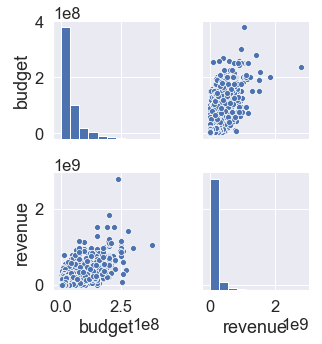

In [511]:
sns.pairplot(movie_meta_droped[['budget','revenue']])

In [543]:
movie_statistic= movie_meta_droped[['budget','revenue','years','title']]

In [544]:
movie_statistic.loc[movie_statistic['budget'].isnull(),'budget']=0

C:\Users\Acer\Miniconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [545]:
movie_statistic.loc[movie_statistic['revenue'].isnull(),'revenue']=0

In [546]:
movie_statistic.loc[movie_statistic['years'].isnull(),'years']=movie_statistic['years'].mean()

In [547]:
movie_statistic[movie_statistic['years'].isnull()]['years']

Series([], Name: years, dtype: float64)

In [548]:
# movie_budget=movie_meta_droped[movie_meta_droped['budget'].isnull()]=0
# movie_revenue=movie_meta_droped['revenue']
# movie_statistic=movie_meta_droped[['budget','revenue']]

In [549]:
from sklearn.model_selection import train_test_split

In [560]:
X= movie_statistic[['budget','revenue']]
y= movie_statistic['years']

In [561]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [562]:
from sklearn.linear_model import LinearRegression

In [563]:
lm=LinearRegression()

In [564]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [566]:
print(lm.coef_)

[ 7.38422157e-08 -6.64104307e-09]


In [565]:
# movie_meta_droped['belongs_to_collection']

In [556]:
movie_statistic[movie_statistic['title']=='My Summer of Love']

budget  revenue   years              title
2195     0.0      0.0  2004.0  My Summer of Love

In [557]:
movie_statistic

budget      revenue   years  \
0     30000000.0  373554033.0  1995.0   
1     58000000.0  352194034.0  1995.0   
2     62000000.0  107879496.0  1995.0   
3     44000000.0   13681765.0  1995.0   
4     98000000.0   10017322.0  1995.0   
5     52000000.0  116112375.0  1995.0   
6     16500000.0  135000000.0  1995.0   
7      4000000.0    4300000.0  1995.0   
8     30000000.0  212385533.0  1995.0   
9     60000000.0   35431113.0  1995.0   
10    30250000.0  115101622.0  1995.0   
11           0.0          0.0  1995.0   
12    50000000.0   30303072.0  1995.0   
13     3600000.0   49800000.0  1995.0   
14    30000000.0  254134910.0  1995.0   
15    11000000.0   39363635.0  1995.0   
16    12000000.0          0.0  1995.0   
17           0.0          0.0  1995.0   
18    18000000.0  122195920.0  1995.0   
19    20000000.0   21284514.0  1995.0   
20    33000000.0  327311859.0  1995.0   
21    55000000.0  346079773.0  1995.0   
22     6000000.0   23341568.0  1995.0   
23           0.0   17519169.0  1995.0   
24    45000000.0          0.0  1995.0   
25    20000000.0          0.0  1996.0   
26           0.0  106269971.0  1995.0   
27     3500000.0   28215918.0  1995.0   
28    19000000.0   25836616.0  1996.0   
29    44000000.0          0.0  1996.0   
...          ...          ...     ...   
4569         0.0     126000.0  2012.0   
4570         0.0          0.0  2010.0   
4571   7500000.0    3347647.0  2004.0   
4572   6500000.0    2025032.0  2005.0   
4573   2000000.0    1672730.0  2003.0   
4574  17000000.0          0.0  2016.0   
4575   1900000.0          0.0  2015.0   
4576         0.0          0.0  2016.0   
4577         0.0          0.0  2013.0   
4578         0.0          0.0  2004.0   
4579    750000.0          0.0  2016.0   
4580   1000000.0          0.0  2014.0   
4581   8000000.0          0.0  2016.0   
4582         0.0          0.0  2014.0   
4583         0.0          0.0  1999.0   
4584         0.0          0.0  2016.0   
4585   3000000.0          0.0  2013.0   
4586    550000.0          0.0  2013.0   
4587    300000.0    2074000.0  2001.0   
4588         0.0          0.0  2016.0   
4589         0.0          0.0  1987.0   
4590         0.0          0.0  2004.0   
4591   1200000.0          0.0  2015.0   
4592   7400000.0   17000000.0  2006.0   
4593         0.0          0.0  2013.0   
4594         0.0          0.0  2010.0   
4595         0.0          0.0  2010.0   
4596         0.0          0.0  2017.0   
4597         0.0          0.0  2013.0   
4598   4700000.0          0.0  2013.0   

                                                title  
0                                           Toy Story  
1                                           GoldenEye  
2                              The American President  
3                                               Nixon  
4                                    Cutthroat Island  
5                                              Casino  
6                               Sense and Sensibility  
7                                          Four Rooms  
8                      Ace Ventura: When Nature Calls  
9                                         Money Train  
10                                         Get Shorty  
11                                            Copycat  
12                                          Assassins  
13                                  Leaving Las Vegas  
14                                               Babe  
15                                   Dead Man Walking  
16                                           Clueless  
17                                        Richard III  
18                                      Mortal Kombat  
19                                         To Die For  
20                                              Se7en  
21                                         Pocahontas  
22                                 The Usual Suspects  
23                              Home for the Holidays  
24                         The Indian in the Cupboard  
25         